In [36]:
import pyroomacoustics as pra
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft, istft

# Path to your 4-channel forest/woodland file
audio_path = "C:/Users/simor/Documents/ICA_Project/data/EigenScape/Woodland/Woodland.1.wav"

data, sr_forest = sf.read(audio_path)

print("Raw data shape:", data.shape)
print("Sample rate:", sr_forest)

# Ensure it's 4 channels
if data.ndim == 1:
    raise ValueError("This file is mono! You need a multichannel file.")
n_samples, n_channels = data.shape
print("n_samples:", n_samples, "n_channels:", n_channels)

# Use only first 4 channels if there are more
n_mics = min(4, n_channels)
audio_forest = data[:, :n_mics]
print("audio_forest shape:", audio_forest.shape)

Raw data shape: (28800000, 25)
Sample rate: 48000
n_samples: 28800000 n_channels: 25
audio_forest shape: (28800000, 4)


In [37]:
duration_sec = 15
N_forest = min(n_samples, duration_sec * sr_forest)

audio_seg = audio_forest[:N_forest, :]
print("Segment shape:", audio_seg.shape)

# Center each channel
audio_seg_centered = audio_seg - audio_seg.mean(axis=0, keepdims=True)
print("Centered segment shape:", audio_seg_centered.shape)

Segment shape: (720000, 4)
Centered segment shape: (720000, 4)


In [38]:
audio = audio_seg_centered
N_forest, n_mics = audio.shape
print("audio shape:", audio.shape)

# STFT parameters
fft_size = 2048
hop = fft_size // 2
window = "hann"

# 1) STFT per channel: X_stft: (frames, freqs, mics)
stft_list = []

for ch in range(n_mics):
    f, t, S = stft(audio[:, ch],
                   fs=sr_forest,
                   nperseg=fft_size,
                   noverlap=fft_size-hop,
                   window=window)
    stft_list.append(S.T)  # (frames, freqs)

X_stft = np.stack(stft_list, axis=-1)
print("X_stft shape (frames, freqs, mics):", X_stft.shape)

# 2) AuxIVA
n_src = n_mics
Y = pra.bss.auxiva(X_stft, n_src=n_src, n_iter=30)
print("Y shape (frames, freqs, sources):", Y.shape)

# 3) iSTFT for each separated source
sep_signals = []
n_frames, n_freqs, n_src = Y.shape

for i in range(n_src):
    Y_i = Y[:, :, i].T   # (freqs, frames)
    t, y_i = istft(Y_i,
                   fs=sr_forest,
                   nperseg=fft_size,
                   noverlap=fft_size-hop,
                   window=window)
    sep_signals.append(y_i[:N_forest])  # trim to exact length

# Now all signals should have the same length
sep_signals = np.stack(sep_signals, axis=-1)  # (T, n_src)
print("Separated time-domain shape:", sep_signals.shape)

audio shape: (720000, 4)
X_stft shape (frames, freqs, mics): (705, 1025, 4)
Y shape (frames, freqs, sources): (705, 1025, 4)
Separated time-domain shape: (720000, 4)


In [39]:
from IPython.display import Audio

def play_forest_mic(i):
    print(f"Playing raw forest mic {i}")
    return Audio(audio[:, i], rate=sr_forest)

def play_forest_sep(i):
    print(f"Playing separated forest source {i}")
    return Audio(sep_signals[:, i], rate=sr_forest)

# Example:
play_forest_mic(0)  # Mixture

Playing raw forest mic 0


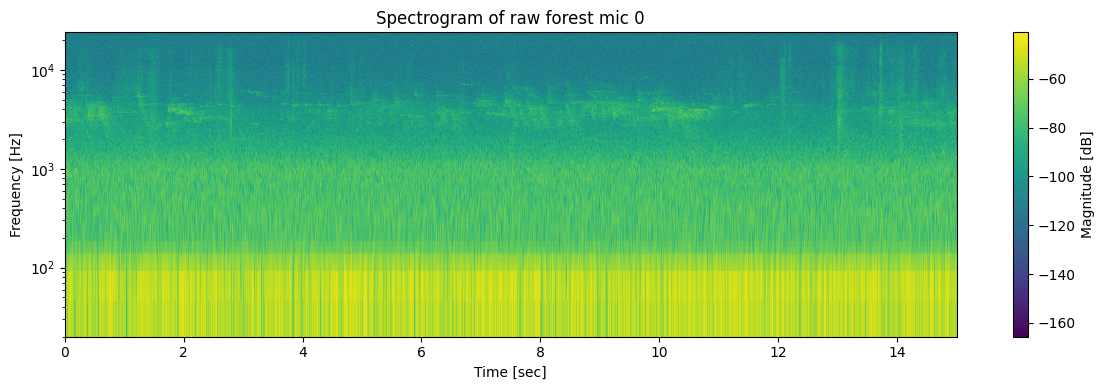

In [40]:
raw = audio[:, 0]
f, t, S_raw = stft(raw, fs=sr_forest, nperseg=1024, noverlap=1024-256)
D_raw = 20 * np.log10(np.abs(S_raw) + 1e-10)  # Convert to dB

plt.figure(figsize=(12, 4))
plt.pcolormesh(t, f, D_raw, shading='gouraud', cmap='viridis')
plt.yscale('log')
plt.ylim([20, sr_forest/2])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Spectrogram of raw forest mic 0")
plt.colorbar(label='Magnitude [dB]')
plt.tight_layout()
plt.show()

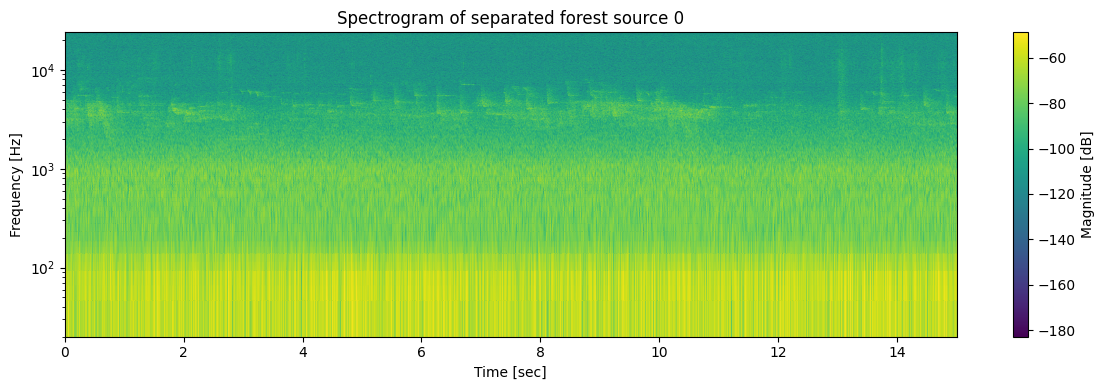

In [41]:
src_idx = 0
sep = sep_signals[:, src_idx]
f, t, S_sep = stft(sep, fs=sr_forest, nperseg=1024, noverlap=1024-256)
D = 20 * np.log10(np.abs(S_sep) + 1e-10)

plt.figure(figsize=(12, 4))
plt.pcolormesh(t, f, D, shading='gouraud', cmap='viridis')
plt.yscale('log')
plt.ylim([20, sr_forest/2])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f"Spectrogram of separated forest source {src_idx}")
plt.colorbar(label='Magnitude [dB]')
plt.tight_layout()
plt.show()

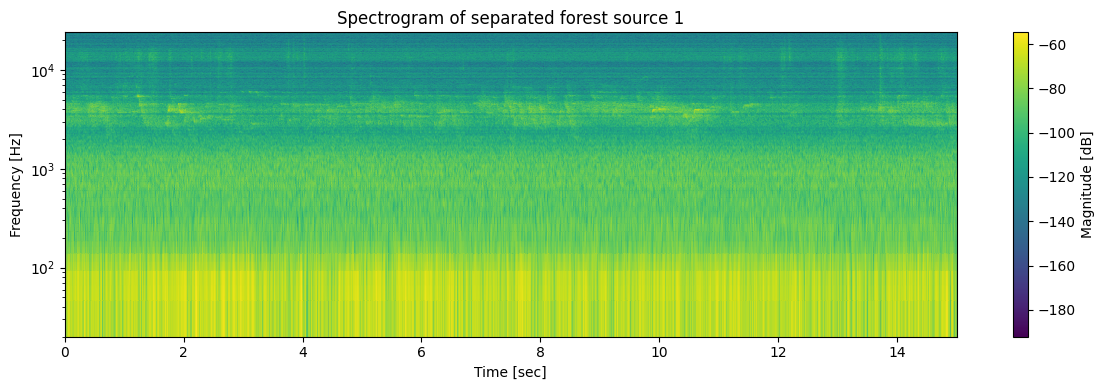

In [42]:
src_idx = 1
sep = sep_signals[:, src_idx]
f, t, S_sep = stft(sep, fs=sr_forest, nperseg=1024, noverlap=1024-256)
D = 20 * np.log10(np.abs(S_sep) + 1e-10)

plt.figure(figsize=(12, 4))
plt.pcolormesh(t, f, D, shading='gouraud', cmap='viridis')
plt.yscale('log')
plt.ylim([20, sr_forest/2])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f"Spectrogram of separated forest source {src_idx}")
plt.colorbar(label='Magnitude [dB]')
plt.tight_layout()
plt.show()

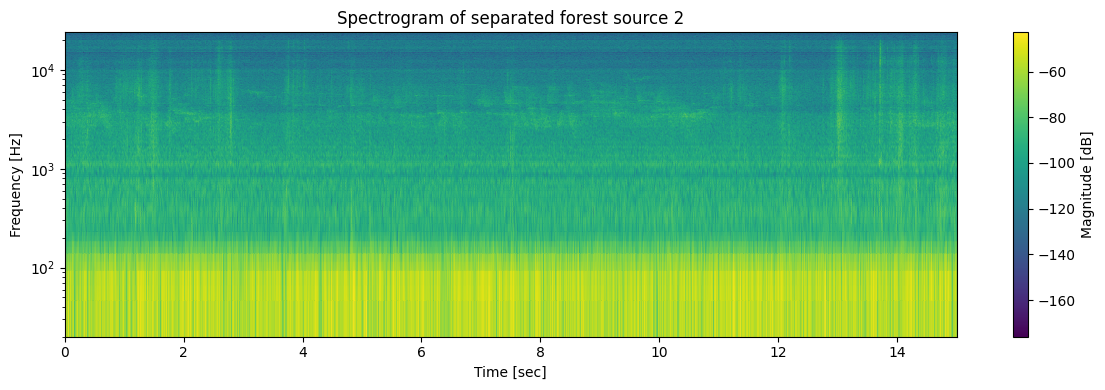

In [43]:
src_idx = 2
sep = sep_signals[:, src_idx]
f, t, S_sep = stft(sep, fs=sr_forest, nperseg=1024, noverlap=1024-256)
D = 20 * np.log10(np.abs(S_sep) + 1e-10)

plt.figure(figsize=(12, 4))
plt.pcolormesh(t, f, D, shading='gouraud', cmap='viridis')
plt.yscale('log')
plt.ylim([20, sr_forest/2])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f"Spectrogram of separated forest source {src_idx}")
plt.colorbar(label='Magnitude [dB]')
plt.tight_layout()
plt.show()

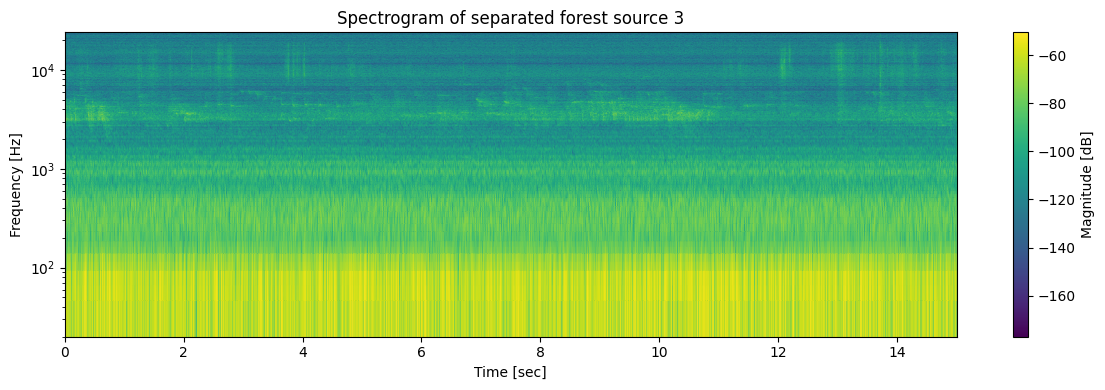

In [44]:
src_idx = 3
sep = sep_signals[:, src_idx]
f, t, S_sep = stft(sep, fs=sr_forest, nperseg=1024, noverlap=1024-256)
D = 20 * np.log10(np.abs(S_sep) + 1e-10)

plt.figure(figsize=(12, 4))
plt.pcolormesh(t, f, D, shading='gouraud', cmap='viridis')
plt.yscale('log')
plt.ylim([20, sr_forest/2])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f"Spectrogram of separated forest source {src_idx}")
plt.colorbar(label='Magnitude [dB]')
plt.tight_layout()
plt.show()

Correlation matrix shape: (8, 8)
Component vs Channel correlation shape: (4, 4)


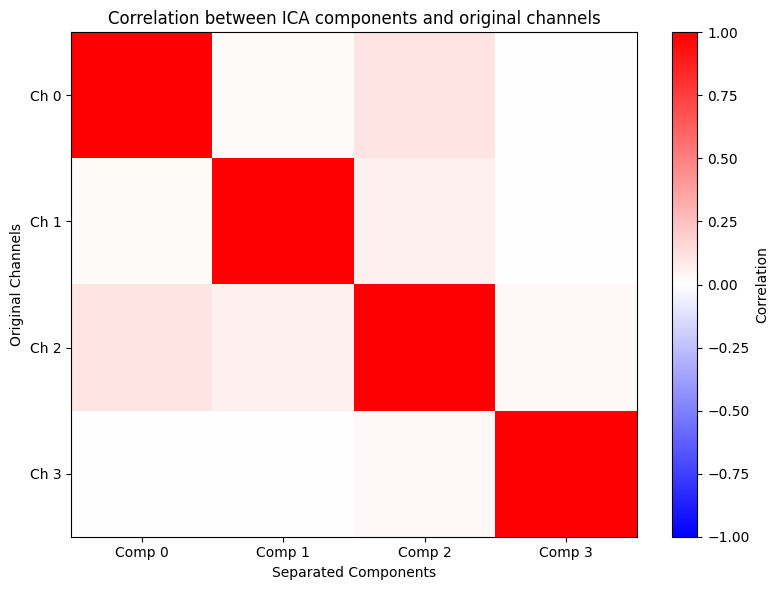

In [47]:
# Correlation between separated components and original channels
# We need to make sure both arrays have the same length and are 2D

# Trim to minimum length (should already be same, but just in case)
min_len = min(audio.shape[0], sep_signals.shape[0])
audio_trim = audio[:min_len, :]  # (T, n_mics)
sep_trim = sep_signals[:min_len, :]  # (T, n_src)

# Combine into one matrix for correlation: [channels | components]
combined = np.hstack([sep_trim, sep_trim])  # (T, n_mics + n_src)

# Compute correlation matrix
corr = np.corrcoef(combined.T)  # Transpose so we correlate columns
print(f"Correlation matrix shape: {corr.shape}")

# Extract the block showing correlation between original channels and separated components
# Rows: original channels (0 to n_mics-1)
# Cols: separated components (n_mics to n_mics+n_src-1)
comp_vs_chan = corr[:n_mics, n_mics:n_mics+n_src]
print(f"Component vs Channel correlation shape: {comp_vs_chan.shape}")

plt.figure(figsize=(8, 6))
plt.imshow(comp_vs_chan, aspect='auto', cmap='bwr', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xlabel("Separated Components")
plt.ylabel("Original Channels")
plt.title("Correlation between ICA components and original channels")
plt.xticks(range(n_src), [f"Comp {i}" for i in range(n_src)])
plt.yticks(range(n_mics), [f"Ch {i}" for i in range(n_mics)])
plt.tight_layout()
plt.show()